In [87]:
import torch
import torch.nn as nn
from torch.optim import SGD

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import idx2numpy

Lineer Regresyon için Toy Dataset Hazırlama


In [88]:
num_samples = 500
num_features = 2
X_np, y_np = datasets.make_regression(num_samples, num_features, noise=5, random_state=42)
y_np = np.expand_dims(y_np, axis=1)

In [89]:
print("X shape:", X_np.shape)
print("İlk 5 X:")
print(X_np[:5])
print("-" * 40)
print("y shape:", y_np.shape)
print("ilk 5 y:")
print(y_np[:5])

X shape: (500, 2)
İlk 5 X:
[[ 0.61058575  0.38019785]
 [-0.54685894 -0.57366201]
 [ 0.12200981 -0.57563783]
 [-1.50314295 -0.25959135]
 [-0.03269475  0.38406545]]
----------------------------------------
y shape: (500, 1)
ilk 5 y:
[[  9.36383821]
 [ -7.67247111]
 [ -4.97547132]
 [-17.41728045]
 [  0.1525533 ]]


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

Numpy Arralerinden Torch Tensorlerine


In [91]:
X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))

X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [92]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

torch.Size([400, 2])
torch.Size([400, 1])
torch.Size([100, 2])
torch.Size([100, 1])


Lineer Regresyon Modeli


In [93]:
lineer_model = nn.Linear(num_features, 1)
loss_func = nn.MSELoss()
optimizer = SGD(lineer_model.parameters(), lr=0.001)

Model Eğitimi


In [94]:
history = {"epoch": [], "loss": []}

for epoch in range(2000):
    y_hat = lineer_model(X_train)
    loss = loss_func(y_hat, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (epoch + 1) % 20 == 0:
        history["epoch"].append(epoch)
        history["loss"].append(loss.item())

Model Eğitim Süreci Zamana Göre Hata Değişimi


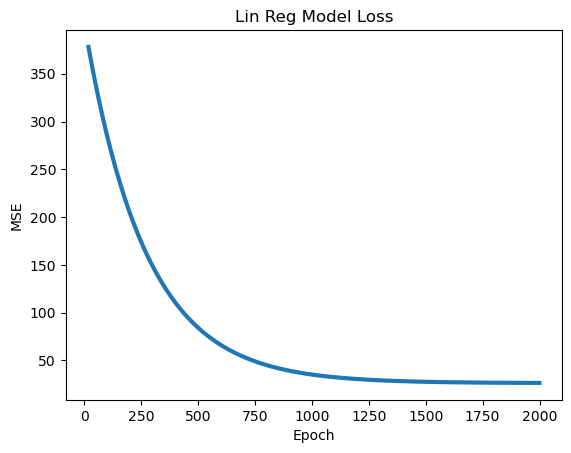

In [95]:
plt.title("Lin Reg Model Loss")
plt.plot(history["epoch"], history["loss"], linewidth=3)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

Test Seti Karşılaştırması


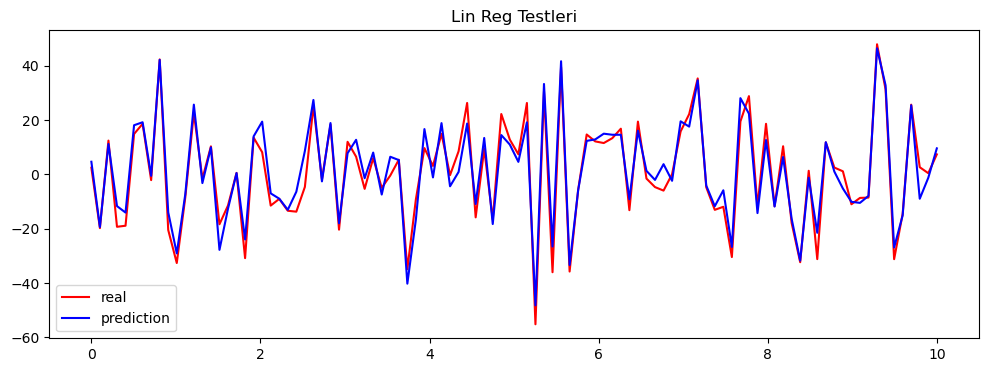

In [96]:
y_predicted = lineer_model(X_test).detach().numpy()
plt.figure(figsize=(12, 4))
plt.title("Lin Reg Testleri")
plt.plot(np.linspace(0, 10, 100), y_test.numpy(), label="real", c="r")
plt.plot(np.linspace(0, 10, 100), y_predicted, label="prediction", c="b")
plt.legend()
plt.show()

Logistic Regression ile MNist Dataset Sınıflandırma

1. Adım: Veri setini okuma


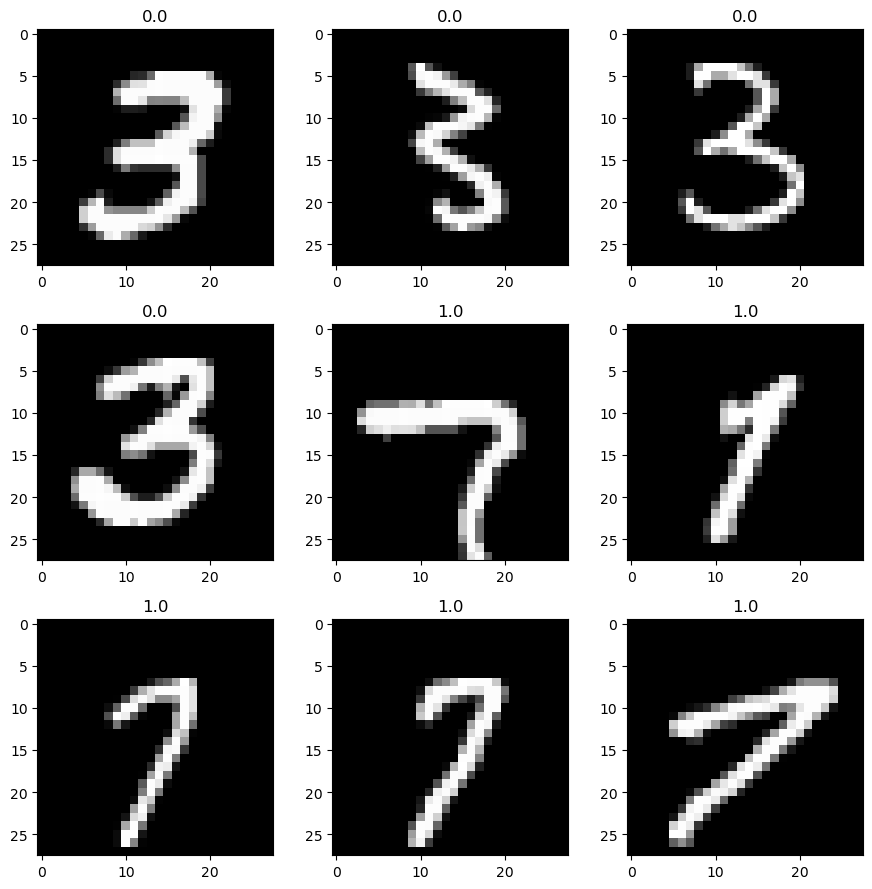

In [97]:
MNIST_DIR = "mnist/"
train_arr = idx2numpy.convert_from_file(MNIST_DIR + "train-images-idx3-ubyte")
train_labels = idx2numpy.convert_from_file(MNIST_DIR + "train-labels-idx1-ubyte")

X_train = train_arr.reshape(60000, -1)
X_train = X_train / 255.0
y_train = np.copy(train_labels)

X_3 = X_train[y_train == 3]
y_3 = np.zeros(X_3.shape[0])

X_7 = X_train[y_train == 7]
y_7 = np.ones(X_7.shape[0])

X_3_7 = np.append(X_3, X_7, axis=0)
y_3_7 = np.append(y_3, y_7)

ds_check_indexes = [0, 1000, 5000, 5200, 6200, 11000, 12300, 12301, 12395]

plt.figure(figsize=(9, 9))

for i, index in enumerate(ds_check_indexes):
    plt.subplot(3, 3, i+1)
    plt.title(str(y_3_7[index]))
    plt.imshow(X_3_7[index].reshape(28, 28), cmap="gray")

plt.tight_layout()
plt.show()

In [98]:
y_3_7 = np.expand_dims(y_3_7, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_3_7, y_3_7, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9916, 784) (9916, 1)
(2480, 784) (2480, 1)


Numpy Arraylerini Torch Tensorlerine Dönüştürme


In [99]:
X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))

X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

Logistic Reg Modeli Oluşturma


In [100]:
class LogReg(nn.Module):
    def __init__(self, n_input_features):
        super().__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_lin = self.linear(x)
        y_hat = torch.sigmoid(y_lin)
        return y_hat

In [101]:
print(X_train.shape)
print(X_train.shape[1])

torch.Size([9916, 784])
784


Log Reg Model Eğitimi


In [102]:
num_features = X_train.shape[1]
logistic_model = LogReg(num_features)
loss_func = nn.BCELoss()
optimizer = SGD(logistic_model.parameters(), lr=0.005)

history = {"epoch": [], "loss": []}
for epoch in range(1000):
    y_hat = logistic_model(X_train)
    loss = loss_func(y_hat, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (epoch + 1) % 20 == 0:
        history["epoch"].append(epoch)
        history["loss"].append(loss.item())

Model Eğitim Süreci Hata Gözlemleri


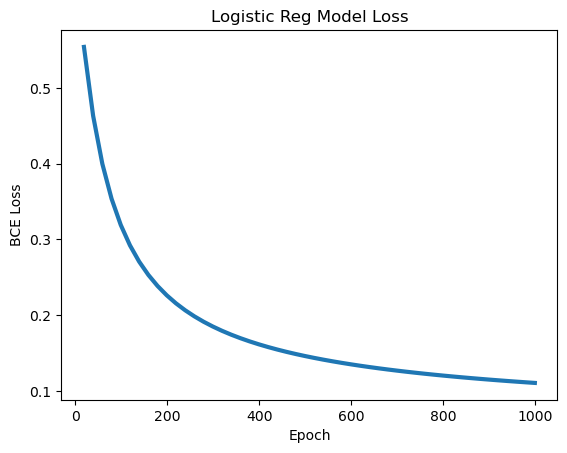

In [103]:
plt.title("Logistic Reg Model Loss")
plt.plot(history["epoch"], history["loss"], linewidth=3)
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")
plt.show()

Tahminler Üzerinden Başarı Hesaplama


In [104]:
with torch.no_grad():
    y_predicted = logistic_model(X_test).numpy()

In [105]:
y_predicted[:3]

array([[0.06562684],
       [0.02787249],
       [0.9829836 ]], dtype=float32)

In [106]:
y_predicted = np.squeeze(y_predicted)
y_predicted[:3]

array([0.06562684, 0.02787249, 0.9829836 ], dtype=float32)

In [107]:
y_test = np.squeeze(y_test.numpy())
y_test[:3]

array([0., 0., 1.], dtype=float32)

In [108]:
y_predicted_classes = np.where(y_predicted > 0.5, 1, 0)
y_predicted_classes[:3]

array([0, 0, 1])

In [109]:
acc = accuracy_score(y_test, y_predicted_classes)
print(acc)

0.9721774193548387
